In [1]:
import cv2

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google.colab'

<IPython.core.display.Javascript object>

Saved to photo.jpg


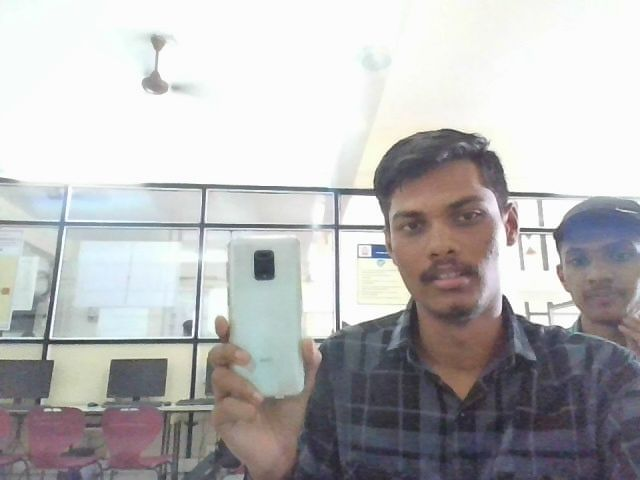

[77  1] [[234 241  79 163]
 [222 146 418 334]]


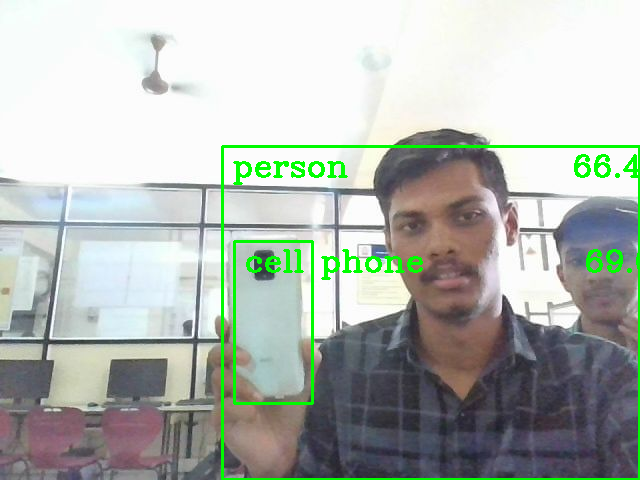

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

thres = 0.6

classNames=[]
classFile = 'coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

configPath ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'      
weighsPath ='frozen_inference_graph.pb' 
net = cv2.dnn_DetectionModel(weighsPath, configPath)   
net.setInputSize(328,328)
net.setInputScale(1.8/127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)


from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  
  display(Image(filename))
except Exception as err:
 
  print(str(err))

img=cv2.imread(filename)


classIds, confs, bbox = net.detect(img, confThreshold = thres)
print(classIds,bbox)        
if len(classIds) !=0:
    for classId, confidence, box in zip(classIds.flatten(),confs.flatten(),bbox):       
        cv2.rectangle(img,box,color=(0,250,0),thickness=2)
        cv2.putText(img,classNames[classId-1],(box[0]+10,box[1]+30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.putText(img,str(round(confidence*100,2)),(box[0] + 350, box[1] + 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0),2)

cv2_imshow(img)
cv2.waitKey(1)
cv2.destroyAllWindows()
